In [1]:
from Denoising_Autoencoder import Denoising_Autoencoder
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [2]:
def zero_center(X_train, X_val ,X_test):
    mean_image = np.mean(X_train)
    X_train -= mean_image
    X_test -= mean_image
    X_val -= mean_image
    return mean_image 

def get_random_batch(data, batch_size):
    start_index = np.random.randint(0, len(data)-batch_size)
    return data[start_index:start_index+batch_size]

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [4]:
X_train = mnist.train.images
X_val = mnist.validation.images
X_test = mnist.test.images

X_train_mean = zero_center(X_train, X_val, X_test)

In [5]:
n_samples = int(X_train.shape[0])
train_epochs = 30
batch_size = 128
display_step = 5

autoencoder = Denoising_Autoencoder(n_input=784, n_hidden=100, scale=0.01)

In [6]:
for epoch in range(train_epochs):
    avg_cost = 0.0
    num_iter = int(n_samples/batch_size)
    for i in range(num_iter):
        batch_x = get_random_batch(X_train, batch_size)
        cost = autoencoder.partial_fit(batch_x)
        avg_cost += cost
    avg_cost /= num_iter
    
    if epoch % display_step == 0:
        print('Epoch:','%04d'%(epoch+1),'cost=','%.5f'%avg_cost)

Epoch: 0001 cost= 1770.80351
Epoch: 0006 cost= 362.64889
Epoch: 0011 cost= 329.05719
Epoch: 0016 cost= 325.91073
Epoch: 0021 cost= 320.86676
Epoch: 0026 cost= 320.74285


In [7]:
print('Test cost:','%.5f'%autoencoder.calc_total_cost(X_test))

Test cost: 24484.34375


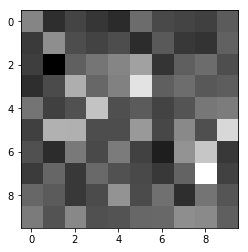

In [14]:
sample_img = X_test[0].reshape((1,-1))
feature_img = autoencoder.transform(sample_img).reshape((10,10))
plt.imshow(feature_img,cmap='gray')

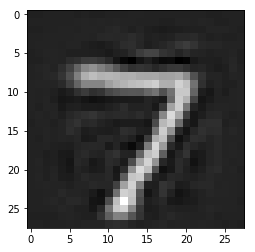

In [17]:
generated_img = autoencoder.generate(feature_img.reshape((1,-1))).reshape((28,28))
plt.imshow(generated_img, cmap='gray')